In [12]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont
import torch

In [13]:
torch.cuda.device_count()

4

In [14]:
torch.cuda.current_device()

0

In [2]:
with open('../data/metadata/iwildcam2021_megadetector_results.json', encoding='utf-8') as json_file:
    megadetector_results = json.load(json_file)

In [123]:
def Convert(lst):
    res_dct = {lst[i]: True for i in range(0, len(lst))}
    return res_dct

In [124]:
len(megadetector_results_df['id'].to_list())

263504

In [128]:
photo_id_dict = Convert(megadetector_results_df['id'].to_list())

In [130]:
'96edde8c-21bc-11ea-a13a-137349068a90' in photo_id_dict

True

In [119]:
megadetector_results_df[megadetector_results_df['id'] == '8d705d8a-21bc-11ea-a13a-137349068a90']

,detections,id,max_detection_conf


In [3]:
megadetector_results_df = pd.DataFrame(megadetector_results["images"])
megadetector_results_df.head()

,detections,id,max_detection_conf
0,"[{'category': '1', 'bbox': [0.6529, 0.5425, 0....",905a3c8c-21bc-11ea-a13a-137349068a90,0.999
1,"[{'category': '1', 'bbox': [0.0147, 0.0, 0.985...",905a3fc0-21bc-11ea-a13a-137349068a90,0.696
2,[],905a420e-21bc-11ea-a13a-137349068a90,0.000
3,"[{'category': '1', 'bbox': [0.0, 0.4669, 0.185...",905a4416-21bc-11ea-a13a-137349068a90,1.000
4,"[{'category': '1', 'bbox': [0.0, 0.0494, 0.528...",905a579e-21bc-11ea-a13a-137349068a90,0.999


- We can see that there are detections for all train samples, since length of df is 263504

In [4]:
megadetector_results_df.shape

(263504, 3)

In [5]:
megadetector_results_df.loc[0:20]['detections']

0     [{'category': '1', 'bbox': [0.6529, 0.5425, 0....
1     [{'category': '1', 'bbox': [0.0147, 0.0, 0.985...
2                                                    []
3     [{'category': '1', 'bbox': [0.0, 0.4669, 0.185...
4     [{'category': '1', 'bbox': [0.0, 0.0494, 0.528...
5                                                    []
6                                                    []
7     [{'category': '1', 'bbox': [0.4172, 0.6741, 0....
8     [{'category': '1', 'bbox': [0.1367, 0.5684, 0....
9     [{'category': '1', 'bbox': [0.8691, 0.5684, 0....
10                                                   []
11    [{'category': '1', 'bbox': [0.8151, 0.3386, 0....
12    [{'category': '1', 'bbox': [0.2482, 0.2649, 0....
13    [{'category': '1', 'bbox': [0.5259, 0.4768, 0....
14    [{'category': '1', 'bbox': [0.4153, 0.5937, 0....
15                                                   []
16    [{'category': '1', 'bbox': [0.0194, 0.2949, 0....
17    [{'category': '1', 'bbox': [0.0497, 0.6197

In [6]:
TRAIN_DATA_PATH = "../data/train/"
TEST_DATA_PATH = "../data/test/"

In [7]:
with open('../data/metadata/iwildcam2021_train_annotations.json', encoding='utf-8') as json_file:
    train_annotations = json.load(json_file)

train_annotations.keys()

dict_keys(['images', 'annotations', 'categories'])

# Implement Object Tracker.py

In [8]:
train_annotations_seq = train_annotations["images"][12:22]

In [141]:
from centroid_tracker import CentroidTracker
size = (480,270)
ct = CentroidTracker()
print(ct.maxDisappeared)
fig = plt.figure(figsize = (25,16))

for i, item in enumerate(train_annotations_seq):
    detections = megadetector_results_df[megadetector_results_df['id'] == item['id']]['detections'].item()
    print(detections)
    rects = []

    # first, draw bbox with cv
    im_path = TRAIN_DATA_PATH + item['file_name']
    ax = fig.add_subplot(4, 3, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize(size)
    draw = ImageDraw.Draw(im)

    for detection in detections:
        
        xmin, ymin, width, height = detection['bbox']
        xmax = xmin + width
        ymax = ymin + height
        
        imageWidth= im.size[0]
        imageHeight= im.size[1]

        x1, x2, y1, y2 = xmin * imageWidth, xmax * imageWidth, ymin * imageHeight, ymax * imageHeight
        
        rects.append((x1, y1, x2, y2))
        
        draw.line([(x1, y1), (x1, y2), (x2, y2),
               (x2, y1), (x1, y1)], width=4, fill='Red')

    objects = ct.update(rects)
    # loop over the tracked objects
    for (objectID, centroid) in objects.items():
        # draw both the ID of the object and the centroid of the
        # object on the output frame
        text = "ID {}".format(objectID)
        draw.text((centroid[0] - 10, centroid[1] - 10), text)

    plt.imshow(im)




1
[]


TypeError: update() missing 1 required positional argument: 'class_results'

# Group test ids into sequences

### Get DataFrame that maps id to seq_id

In [15]:
with open('../data/metadata/iwildcam2021_test_information.json', encoding='utf-8') as json_file:
    test_information =json.load(json_file)
    
df_test_info = pd.DataFrame(test_information["images"])[["id", "seq_id"]]
df_test_info.head()

,id,seq_id
0,8b31d3be-21bc-11ea-a13a-137349068a90,a91ebc18-0cd3-11eb-bed1-0242ac1c0002
1,8cf202be-21bc-11ea-a13a-137349068a90,a91ebc18-0cd3-11eb-bed1-0242ac1c0002
2,8a87e62e-21bc-11ea-a13a-137349068a90,a91ebc18-0cd3-11eb-bed1-0242ac1c0002
3,8e6994f4-21bc-11ea-a13a-137349068a90,a91ebc18-0cd3-11eb-bed1-0242ac1c0002
4,948b29e2-21bc-11ea-a13a-137349068a90,a91ebc18-0cd3-11eb-bed1-0242ac1c0002


In [16]:
df_test_info[df_test_info["id"] == '8b31d3be-21bc-11ea-a13a-137349068a90']['seq_id'].item()

'a91ebc18-0cd3-11eb-bed1-0242ac1c0002'

### Group ids in test dataset to seq_id

In [17]:
from os import listdir
from os.path import isfile, join
mypath = '../data/test/'

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [18]:
seq_id_dict = {}

In [19]:
df_test_info[df_test_info["id"] == onlyfiles[0][:-4]]['seq_id'].item()

'9433b9dc-21bc-11ea-a13a-137349068a90'

In [20]:
for id in onlyfiles:
    seq_id = df_test_info[df_test_info["id"] == id[:-4]]['seq_id'].item()
    
    if seq_id in seq_id_dict:
        seq_id_dict[seq_id].append(id)
    else:
        seq_id_dict[seq_id] = [id]


In [21]:
len(seq_id_dict), len(onlyfiles)

(11057, 60214)

In [22]:
seq_id_dict['98e6e01c-21bc-11ea-a13a-137349068a90']

['98e6df18-21bc-11ea-a13a-137349068a90.jpg',
 '98df7b2e-21bc-11ea-a13a-137349068a90.jpg',
 '95afb950-21bc-11ea-a13a-137349068a90.jpg']

# Declare Model

In [23]:
import sys
sys.path.append('../input/pytorch-image-models/pytorch-image-models-master')

import collections
import gc
import json
import os
import random
import time
import warnings
warnings.simplefilter("ignore")

from albumentations import *
from albumentations.pytorch import ToTensor
import cv2
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import tifffile as tiff
import timm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, Dataset, sampler
from tqdm import tqdm_notebook as tqdm

In [24]:
DATASET = "../data/"
CROPPED_DATA = "../data/"

TRAIN_CROPPED_DATA = "../data/crop_train/"
TEST_CROPPED_DATA = "../data/crop_test/"

BATCH_SIZE = 32
EPOCHS = 300
NUM_WORKERS = 4
SEED = 2021
DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')

In [44]:
def set_seed(seed=2**3):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
set_seed(SEED)

In [25]:
# ====================================================
# EfficientNet Model
# ====================================================

class enet_v2(nn.Module):

    def __init__(self, backbone, out_dim, pretrained=False):
        super(enet_v2, self).__init__()
        self.enet = timm.create_model(backbone, pretrained=pretrained)
        in_ch = self.enet.classifier.in_features
        self.myfc = nn.Linear(in_ch, out_dim)
        self.enet.classifier = nn.Identity()

    def forward(self, x):
        x = self.enet(x)
        x = self.myfc(x)
        return x

In [26]:
model = enet_v2(backbone="tf_efficientnet_b0", out_dim=205)
model.to(DEVICE)
model.load_state_dict(torch.load(f"../{EPOCHS}_.pth"))
model.eval()

enet_v2(
  (enet): EfficientNet(
    (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (act1): SiLU(inplace=True)
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act1): SiLU(inplace=True)
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          )
          (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act2): I

### Get BBOX for each id

In [27]:
megadetector_results_df[megadetector_results_df['id'] == onlyfiles[1][:-4]]['detections']

180456    [{'category': '1', 'bbox': [0.0, 0.0061, 1.0, ...
Name: detections, dtype: object

In [35]:
def img2tensor(img,dtype:np.dtype=np.float32):
    if img.ndim==2 : img = np.expand_dims(img,2)
    img = np.transpose(img,(2,0,1))
    return torch.from_numpy(img.astype(dtype, copy=False))

In [41]:
mean = np.array([0.37087523, 0.370876, 0.3708759] )
std = np.array([0.21022698, 0.21022713, 0.21022706])

class IWildcamTestDataset(Dataset):
    def __init__(self, image, tfms=None):
        # self.ids = df["id"]
        # self.idx = df["idx"]
        self.tfms = tfms
        self.image = image
        
    def __len__(self):
        return 1
    
    def __getitem__(self, idx):
        # size = (256, 256)
        # image_id = self.ids[idx]
        # image_idx = self.idx[idx]
        
        cropped_image = np.array(self.image)
        
        cropped_image = cv2.resize(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB), (256, 256))
        

        if self.tfms is not None:
            augmented = self.tfms(image=img)
            img = augmented['image']
            
        # we should normalize here
        return img2tensor((cropped_image/255.0 - mean)/std)

In [68]:
import importlib
import sys
# from centroid_tracker import CentroidTracker

In [71]:
importlib.reload(sys.modules['centroid_tracker'])


In [151]:
for seq_id in seq_id_dict:
    print(seq_id, seq_id_dict[seq_id])

, '924aa284-21bc-11ea-a13a-137349068a90.jpg']
968321f0-21bc-11ea-a13a-137349068a90 ['86de81cc-21bc-11ea-a13a-137349068a90.jpg', '9683201a-21bc-11ea-a13a-137349068a90.jpg', '93044b6c-21bc-11ea-a13a-137349068a90.jpg']
a917bd3c-0cd3-11eb-bed1-0242ac1c0002 ['889dd58a-21bc-11ea-a13a-137349068a90.jpg', '985fd9d2-21bc-11ea-a13a-137349068a90.jpg']
86c20dee-21bc-11ea-a13a-137349068a90 ['86c20c04-21bc-11ea-a13a-137349068a90.jpg']
9923996c-21bc-11ea-a13a-137349068a90 ['99239796-21bc-11ea-a13a-137349068a90.jpg', '99062e7c-21bc-11ea-a13a-137349068a90.jpg', '8bc580f0-21bc-11ea-a13a-137349068a90.jpg']
97627738-21bc-11ea-a13a-137349068a90 ['96694c12-21bc-11ea-a13a-137349068a90.jpg', '8fbeb7ee-21bc-11ea-a13a-137349068a90.jpg', '8915bad2-21bc-11ea-a13a-137349068a90.jpg']
a91f7a04-0cd3-11eb-bed1-0242ac1c0002 ['8e82a8f4-21bc-11ea-a13a-137349068a90.jpg', '981e7fc8-21bc-11ea-a13a-137349068a90.jpg', '93c1dff6-21bc-11ea-a13a-137349068a90.jpg', '8834cfc2-21bc-11ea-a13a-137349068a90.jpg', '8dbce79a-21bc-11ea-a1

    8a0ca5fe-21bc-11ea-a13a-137349068a90.jpg
     [{'category': '1', 'bbox': [0.6225, 0.3935, 0.0562, 0.0417], 'conf': 0.502}, {'category': '1', 'bbox': [0.6189, 0.3911, 0.0817, 0.0491], 'conf': 0.317}]
    91316342-21bc-11ea-a13a-137349068a90.jpg
     [{'category': '1', 'bbox': [0.621, 0.3908, 0.0695, 0.0501], 'conf': 0.821}, {'category': '1', 'bbox': [0.5965, 0.3936, 0.0875, 0.059], 'conf': 0.303}]


[187]

    8eb8018e-21bc-11ea-a13a-137349068a90.jpg
     [{'category': '1', 'bbox': [0.6205, 0.3917, 0.0826, 0.0458], 'conf': 0.416}]


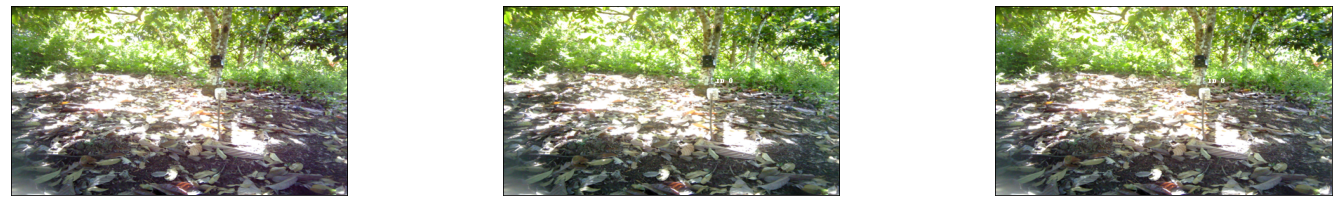

In [155]:
count_results = []
# seq_number = 1
# print("start")

# print(seq_number, seq_id)
# seq_number += 1
ct = CentroidTracker()
size = (480,270)
fig = plt.figure(figsize = (25,16))
for i, item in enumerate(seq_id_dict['91316518-21bc-11ea-a13a-137349068a90']):
    print("    " + item)
    if item[:-4] not in photo_id_dict:
        continue
    detections = megadetector_results_df[megadetector_results_df['id'] == item[:-4]]['detections'].item()
    
    print("    ", detections)
    rects = []
    class_results = []

    # first, draw bbox with cv
    im_path = TEST_DATA_PATH + item
    ax = fig.add_subplot(4, 3, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize(size)
    draw = ImageDraw.Draw(im)

    for detection in detections:
        if detection['conf'] <= 0.8:
            continue

        xmin, ymin, width, height = detection['bbox']
        xmax = xmin + width
        ymax = ymin + height
        
        imageWidth= im.size[0]
        imageHeight= im.size[1]

        x1, x2, y1, y2 = xmin * imageWidth, xmax * imageWidth, ymin * imageHeight, ymax * imageHeight
        
        rects.append((x1, y1, x2, y2))
        
        # draw.line([(x1, y1), (x1, y2), (x2, y2),
            #    (x2, y1), (x1, y1)], width=4, fill='Red')
        
        cropped_image = im.crop((x1, y1, x2, y2)).resize((256, 256))
        ds_test = IWildcamTestDataset(cropped_image)
        dl_test = DataLoader(ds_test, batch_size=1, shuffle=False, num_workers=NUM_WORKERS)
        
        

        with torch.no_grad():
            for img in tqdm(dl_test):
                img = img.to(DEVICE)
                outputs = model(img)
                output_labels = torch.argmax(outputs, dim=1).tolist()
                print(output_labels)
                class_results.append(output_labels[0])

    objects = ct.update(rects, class_results)
    # loop over the tracked objects
    for (objectID, centroid) in objects.items():
        # draw both the ID of the object and the centroid of the
        # object on the output frame
        
        text = "ID {}".format(objectID)
        draw.text((centroid[0] - 10, centroid[1] - 10), text)


    plt.imshow(im)
    count_results.append([seq_id] + ct.class_count[1:])

In [145]:
count_results = []
# seq_number = 1
# print("start")
for seq_id in seq_id_dict:
    # print(seq_number, seq_id)
    # seq_number += 1
    ct = CentroidTracker()
    size = (480,270)
    # fig = plt.figure(figsize = (25,16))
    for i, item in enumerate(seq_id_dict[seq_id]):
        print("    " + item)
        if item[:-4] not in photo_id_dict:
            continue
        detections = megadetector_results_df[megadetector_results_df['id'] == item[:-4]]['detections'].item()
        
        print("    ", detections)
        rects = []
        class_results = []

        # first, draw bbox with cv
        im_path = TEST_DATA_PATH + item
        # ax = fig.add_subplot(4, 3, i+1, xticks=[], yticks=[])
        im = Image.open(im_path)
        im = im.resize(size)
        # draw = ImageDraw.Draw(im)

        for detection in detections:
            if detection['conf'] <= 0.8:
                continue

            xmin, ymin, width, height = detection['bbox']
            xmax = xmin + width
            ymax = ymin + height
            
            imageWidth= im.size[0]
            imageHeight= im.size[1]

            x1, x2, y1, y2 = xmin * imageWidth, xmax * imageWidth, ymin * imageHeight, ymax * imageHeight
            
            rects.append((x1, y1, x2, y2))
            
            # draw.line([(x1, y1), (x1, y2), (x2, y2),
            #        (x2, y1), (x1, y1)], width=4, fill='Red')
            
            cropped_image = im.crop((x1, y1, x2, y2)).resize((256, 256))
            ds_test = IWildcamTestDataset(cropped_image)
            dl_test = DataLoader(ds_test, batch_size=1, shuffle=False, num_workers=NUM_WORKERS)
           
            

            with torch.no_grad():
                for img in tqdm(dl_test):
                    img = img.to(DEVICE)
                    outputs = model(img)
                    output_labels = torch.argmax(outputs, dim=1).tolist()
                    # print(output_labels)
                    class_results.append(output_labels[0])

        objects = ct.update(rects, class_results)
        # loop over the tracked objects
        # for (objectID, centroid) in objects.items():
            # draw both the ID of the object and the centroid of the
            # object on the output frame
            
            # text = "ID {}".format(objectID)
            # draw.text((centroid[0] - 10, centroid[1] - 10), text)


        # plt.imshow(im)
    count_results.append([seq_id] + ct.class_count[1:])

    937d1920-21bc-11ea-a13a-137349068a90.jpg
     []
    9433b81a-21bc-11ea-a13a-137349068a90.jpg
     []
    98e5ba52-21bc-11ea-a13a-137349068a90.jpg
     [{'category': '1', 'bbox': [0.0, 0.0061, 1.0, 0.9939], 'conf': 0.698}]
detection is shit
    9944097c-21bc-11ea-a13a-137349068a90.jpg
     [{'category': '1', 'bbox': [0.0, 0.0118, 1.0, 0.9882], 'conf': 0.689}]
detection is shit
    987b4afa-21bc-11ea-a13a-137349068a90.jpg
     [{'category': '1', 'bbox': [0.0, 0.0088, 1.0, 0.9912], 'conf': 0.716}]
detection is shit
    920e3902-21bc-11ea-a13a-137349068a90.jpg
     [{'category': '1', 'bbox': [0.7707, 0.5442, 0.2282, 0.4282], 'conf': 0.999}]



    95480c4c-21bc-11ea-a13a-137349068a90.jpg
     [{'category': '1', 'bbox': [0.0, 0.628, 0.3522, 0.3454], 'conf': 0.999}]


KeyboardInterrupt: 

In [112]:
len(seq_id_dict)

11057

In [110]:
for item in seq_id_dict:
    print(seq_id_dict[item])

a13a-137349068a90.jpg']
['877b941c-21bc-11ea-a13a-137349068a90.jpg']
['93b401ec-21bc-11ea-a13a-137349068a90.jpg', '8b161066-21bc-11ea-a13a-137349068a90.jpg', '8c4f9fa6-21bc-11ea-a13a-137349068a90.jpg']
['86ffe114-21bc-11ea-a13a-137349068a90.jpg']
['8e2c6e44-21bc-11ea-a13a-137349068a90.jpg']
['91d4cda2-21bc-11ea-a13a-137349068a90.jpg', '878017a8-21bc-11ea-a13a-137349068a90.jpg', '8d3000f0-21bc-11ea-a13a-137349068a90.jpg']
['9903c6e6-21bc-11ea-a13a-137349068a90.jpg', '8d4b1610-21bc-11ea-a13a-137349068a90.jpg']
['8d3d2c94-21bc-11ea-a13a-137349068a90.jpg', '8d2e30a4-21bc-11ea-a13a-137349068a90.jpg', '91834e32-21bc-11ea-a13a-137349068a90.jpg', '873dee00-21bc-11ea-a13a-137349068a90.jpg']
['87f21a42-21bc-11ea-a13a-137349068a90.jpg']
['95d87d18-21bc-11ea-a13a-137349068a90.jpg', '90c9da88-21bc-11ea-a13a-137349068a90.jpg']
['8f9c5a64-21bc-11ea-a13a-137349068a90.jpg', '8774a2e2-21bc-11ea-a13a-137349068a90.jpg', '913d3190-21bc-11ea-a13a-137349068a90.jpg']
['8ee9b738-21bc-11ea-a13a-137349068a90.jpg

In [132]:
len(count_results)

2

# Submit File

In [133]:
sub = pd.read_csv("../data/sample_submission.csv")
col_Predicted = [col for col in sub.columns if "Predicted" in col]

In [134]:
len(col_Predicted)

204

In [135]:
col_Predicted.insert(0, "Id")

In [137]:
col_Predicted[0]

'Id'

In [138]:
df = pd.DataFrame(count_results, columns=col_Predicted)

In [139]:
df

,Id,Predicted2,Predicted3,Predicted4,Predicted6,Predicted7,Predicted8,Predicted9,Predicted10,Predicted12,...,Predicted559,Predicted562,Predicted563,Predicted564,Predicted565,Predicted566,Predicted567,Predicted568,Predicted570,Predicted571
0,9433b9dc-21bc-11ea-a13a-137349068a90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,99440b52-21bc-11ea-a13a-137349068a90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
df.to_csv("submission.csv", index=False)